In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import math
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
resultsRolling_month={'M01AB':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'M01AE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BA':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05B':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05C':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R03':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R06':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]}
resultsRolling_monthdf = pd.DataFrame(resultsRolling_month)
resultsRolling_monthdf.index = ['Seasonal Naive MAPE', 'AutoARIMA MAPE', 'Prophet MAPE','LSTM MAPE','Seasonal Naive MSE','AutoARIMA MSE','Prophet MSE','LSTM MSE']

In [4]:
resultsRolling_week={'M01AB':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'M01AE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BA':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05B':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05C':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R03':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R06':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]}
resultsRolling_weekdf = pd.DataFrame(resultsRolling_week)
resultsRolling_weekdf.index = ['Seasonal Naive MAPE', 'AutoARIMA MAPE', 'Prophet MAPE','LSTM MAPE','Seasonal Naive MSE','AutoARIMA MSE','Prophet MSE','LSTM MSE']

In [11]:
resultsRolling_daily={'M01AB':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'M01AE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BA':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N02BE':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05B':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'N05C':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R03':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
     'R06':[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]}
resultsRolling_dailydf = pd.DataFrame(resultsRolling_daily)
resultsRolling_dailydf.index = ['Seasonal Naive MAPE', 'AutoARIMA MAPE', 'Prophet MAPE','LSTM MAPE','Seasonal Naive MSE','AutoARIMA MSE','Prophet MSE','LSTM MSE']

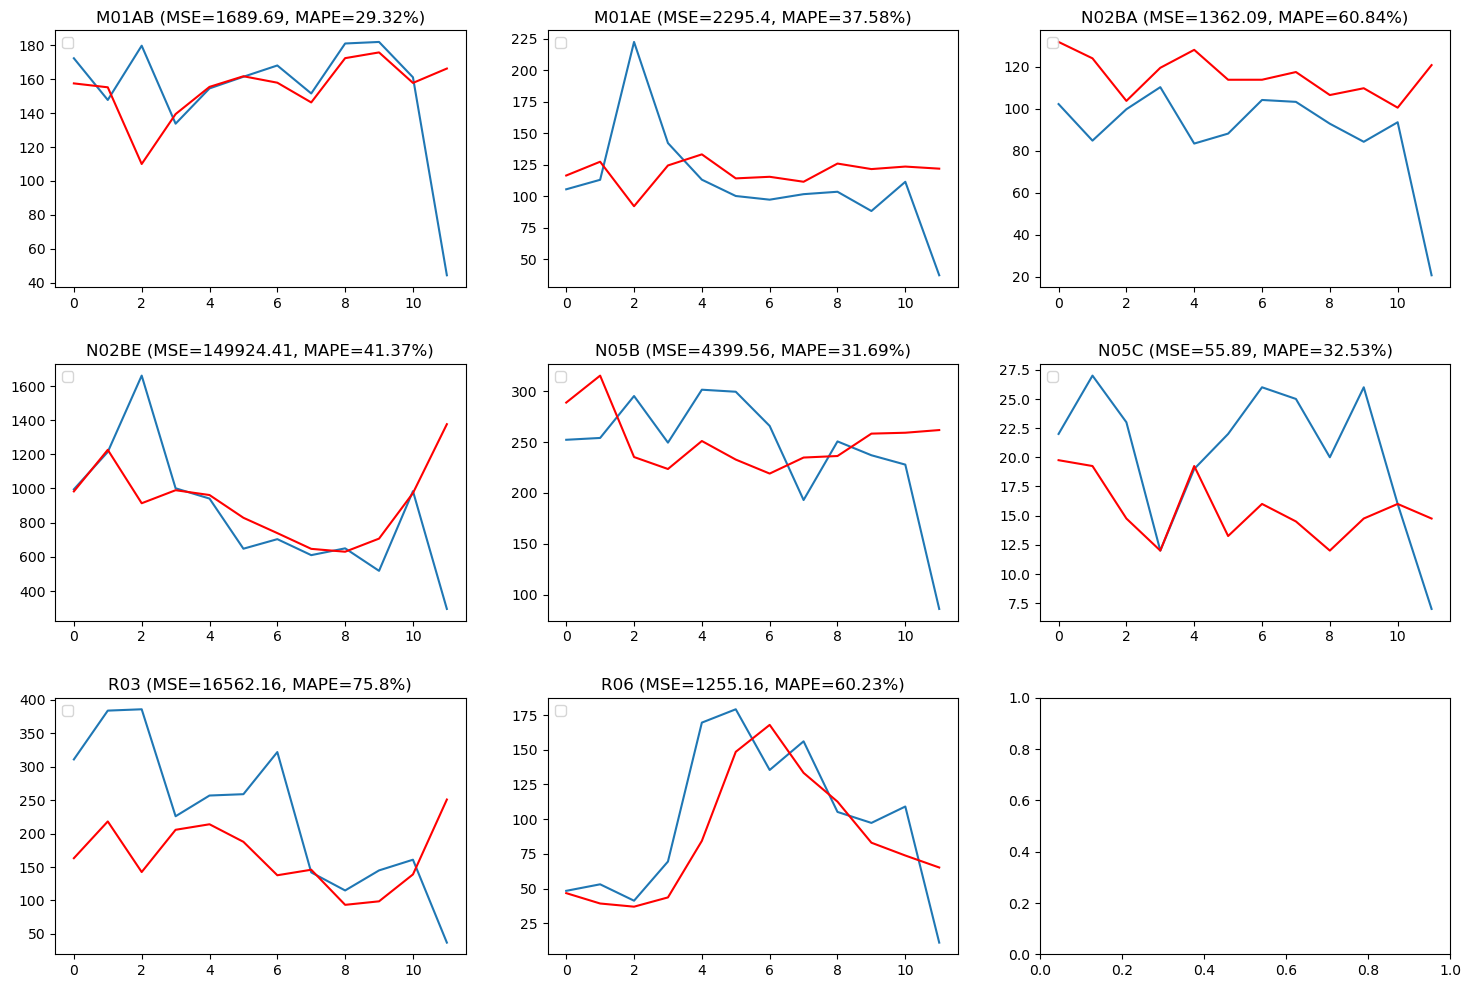

In [13]:
df=pd.read_csv('salesmonthly.csv')
subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))  
plt.subplots_adjust(wspace=0.2, hspace=0.3)  
for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-12
    test = X[size:len(X)]
    train = X[0:size]
    predictions=list()
    history = [x for x in train]
    for i in range(len(test)):
        obs=list()
        for y in range(1,5):
            obs.append(train[-(y*12)+i])
        yhat = np.mean(obs)
        predictions.append(yhat)
        history.append(test[i])
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRolling_monthdf.loc['Seasonal Naive MSE',x]=error
    resultsRolling_monthdf.loc['Seasonal Naive MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()    

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2856\4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


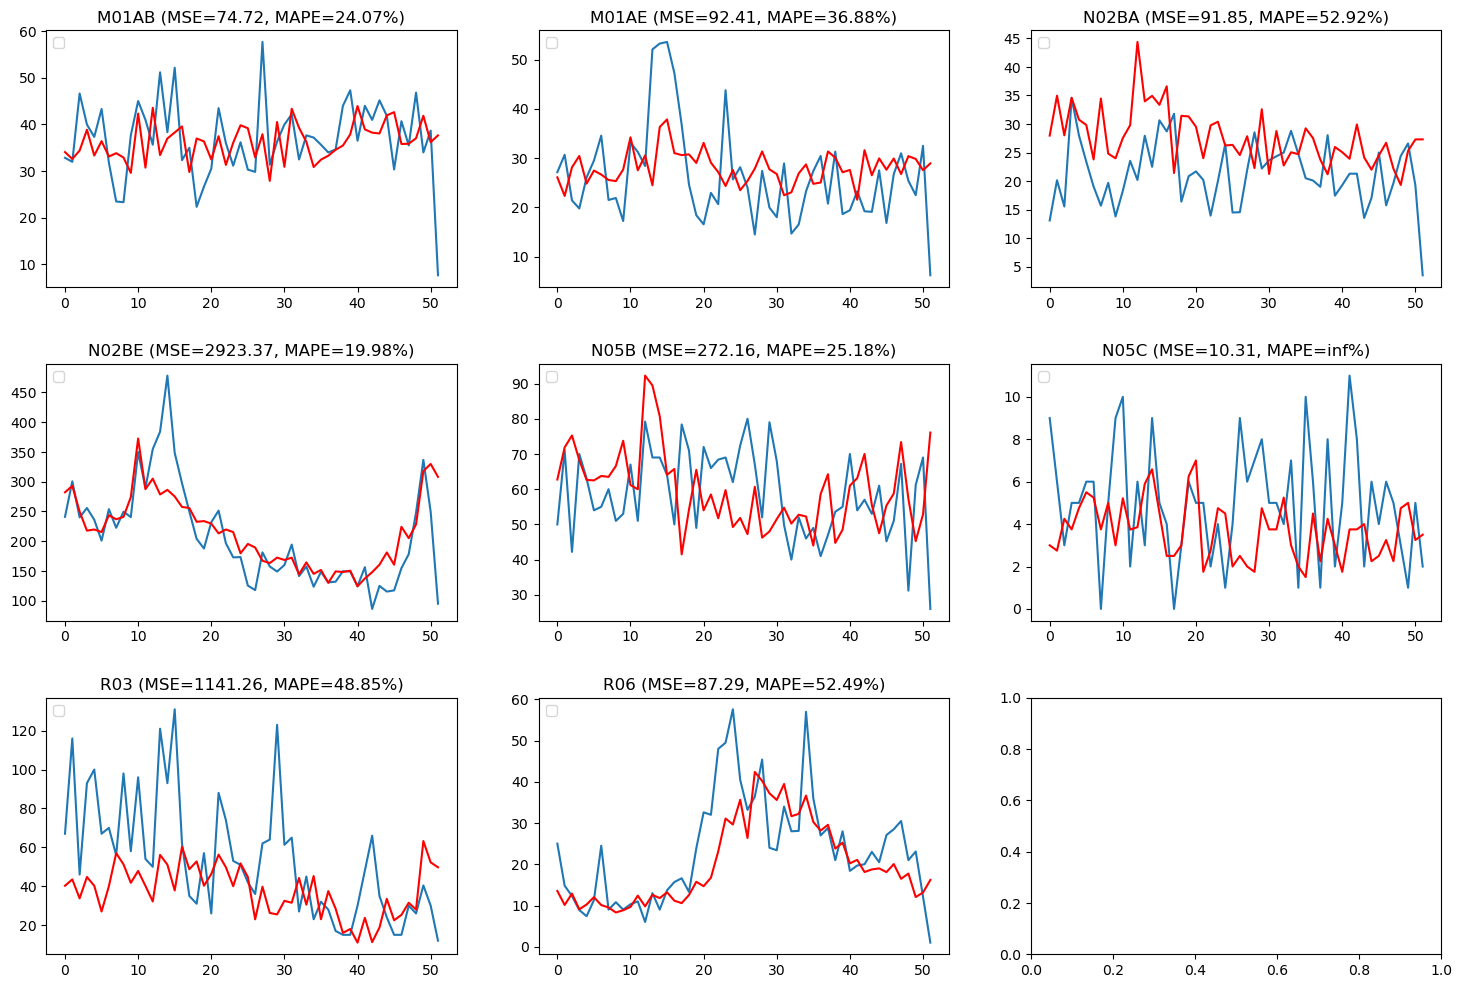

In [14]:
df=pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))  
plt.subplots_adjust(wspace=0.2, hspace=0.3)  
for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-52
    test = X[size:len(X)]
    train = X[0:size]
    predictions=list()
    history = [x for x in train]
    for i in range(len(test)):
        obs=list()
        for y in range(1,5):
            obs.append(train[-(y*52)+i])
        yhat = np.mean(obs)
        predictions.append(yhat)
        history.append(test[i])
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRolling_weekdf.loc['Seasonal Naive MSE',x]=error
    resultsRolling_weekdf.loc['Seasonal Naive MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()    

C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2856\4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2856\4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2856\4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2856\4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2856\4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2856\4111968303.py:3: RuntimeWarning: divide by zero e

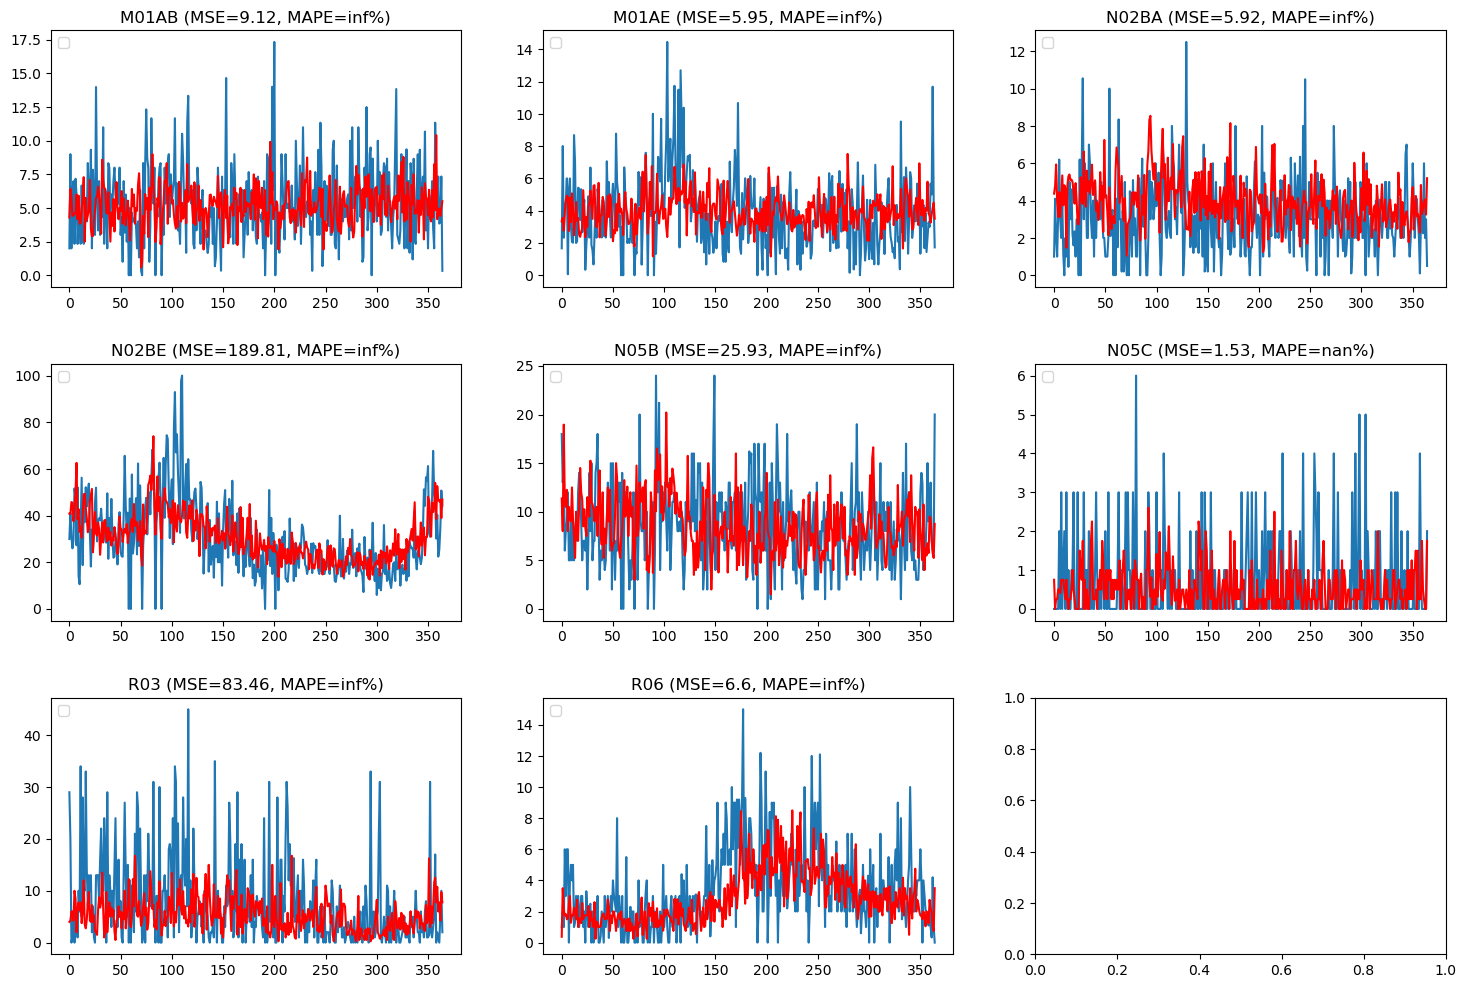

In [16]:
df=pd.read_csv('salesdaily.csv')
subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))  
plt.subplots_adjust(wspace=0.2, hspace=0.3) 
for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X=df[x].values
    size = len(X)-365
    test = X[size:len(X)]
    train = X[0:size]
    predictions=list()
    history = [x for x in train]
    for i in range(len(test)):
        obs=list()
        for y in range(1,5):
            obs.append(train[-(y*365)+i])
        yhat = np.mean(obs)
        predictions.append(yhat)
        history.append(test[i])
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRolling_dailydf.loc['Seasonal Naive MSE',x]=error
    resultsRolling_dailydf.loc['Seasonal Naive MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()    

23:20:12 - cmdstanpy - INFO - Chain [1] start processing
23:20:13 - cmdstanpy - INFO - Chain [1] done processing
23:20:13 - cmdstanpy - INFO - Chain [1] start processing
23:20:14 - cmdstanpy - INFO - Chain [1] done processing
23:20:14 - cmdstanpy - INFO - Chain [1] start processing
23:20:15 - cmdstanpy - INFO - Chain [1] done processing
23:20:15 - cmdstanpy - INFO - Chain [1] start processing
23:20:15 - cmdstanpy - INFO - Chain [1] done processing
23:20:15 - cmdstanpy - INFO - Chain [1] start processing
23:20:16 - cmdstanpy - INFO - Chain [1] done processing
23:20:16 - cmdstanpy - INFO - Chain [1] start processing
23:20:17 - cmdstanpy - INFO - Chain [1] done processing
23:20:17 - cmdstanpy - INFO - Chain [1] start processing
23:20:17 - cmdstanpy - INFO - Chain [1] done processing
23:20:17 - cmdstanpy - INFO - Chain [1] start processing
23:20:17 - cmdstanpy - INFO - Chain [1] done processing


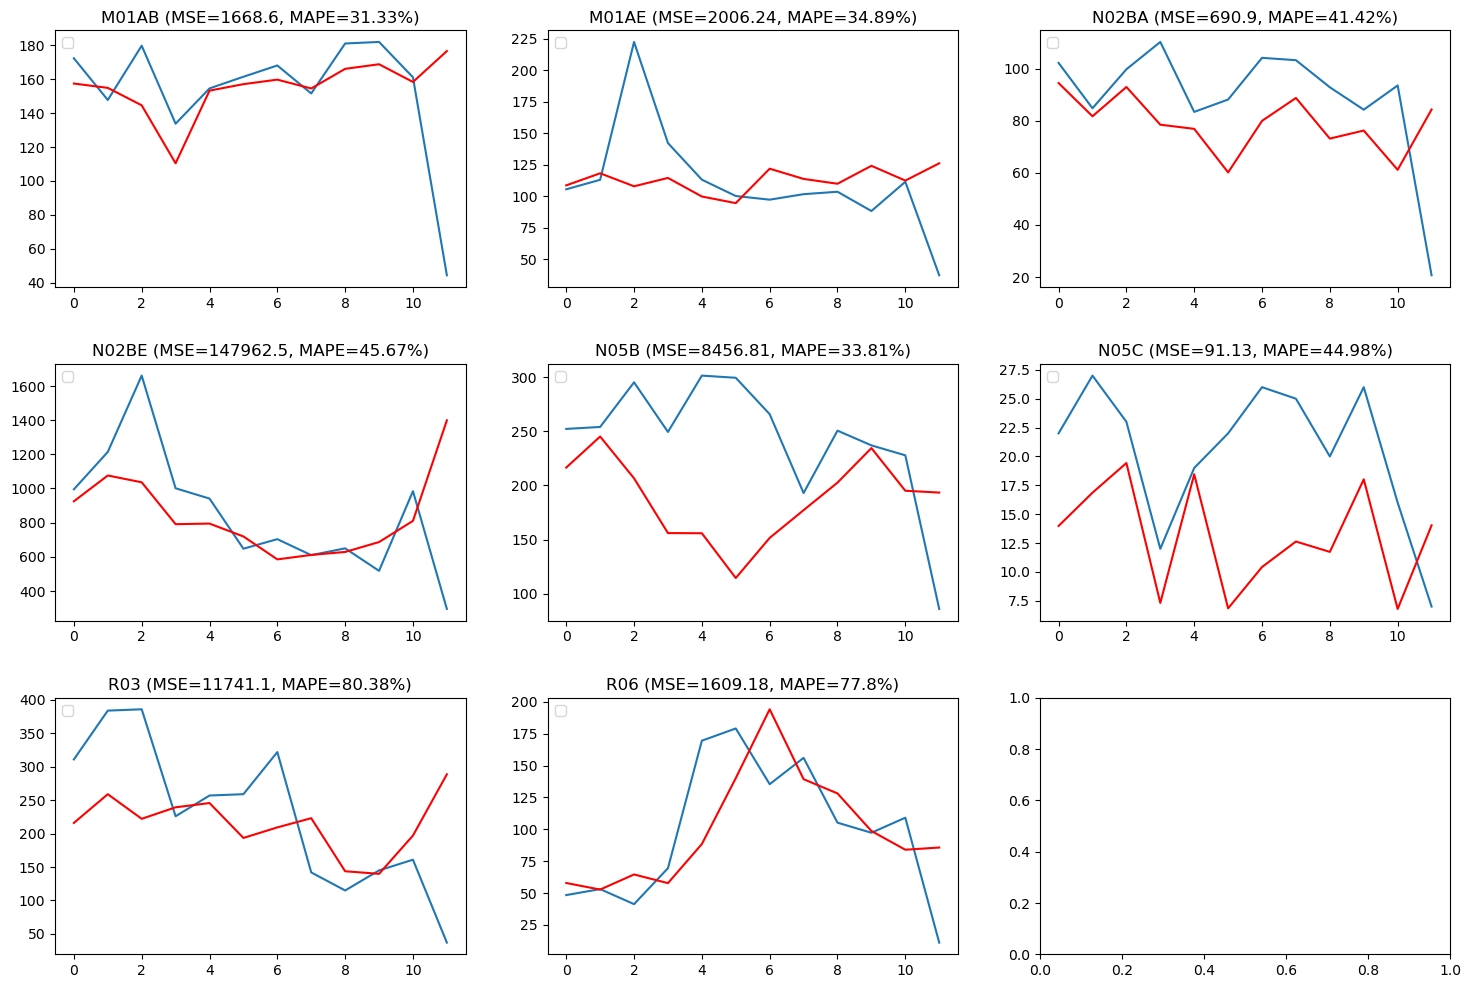

In [19]:
df=pd.read_csv('salesmonthly.csv')
subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))  
plt.subplots_adjust(wspace=0.2, hspace=0.3)  
for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    X = df[['datum', x]].copy()  # Select date and the specific column
    size = len(X) - 12
    
    # Split into training and testing sets
    train_df = X.iloc[:size].rename(columns={'datum': 'ds', x: 'y'})
    test_df = X.iloc[size:].rename(columns={'datum': 'ds', x: 'y'})
    
    # Fit the model
    model = Prophet()
    model.fit(train_df)
    
    df_test_fcst = model.predict(test_df[['ds']])
    
    # Extract actual and predicted values
    test = test_df['y'].values
    predictions = df_test_fcst['yhat'].values

    rowindex = subplotindex // numcols
    colindex = subplotindex % numcols

    
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRolling_monthdf.loc['Prophet MSE',x]=error
    resultsRolling_monthdf.loc['Prophet MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()    

23:20:20 - cmdstanpy - INFO - Chain [1] start processing
23:20:20 - cmdstanpy - INFO - Chain [1] done processing
23:20:20 - cmdstanpy - INFO - Chain [1] start processing
23:20:20 - cmdstanpy - INFO - Chain [1] done processing
23:20:20 - cmdstanpy - INFO - Chain [1] start processing
23:20:20 - cmdstanpy - INFO - Chain [1] done processing
23:20:21 - cmdstanpy - INFO - Chain [1] start processing
23:20:21 - cmdstanpy - INFO - Chain [1] done processing
23:20:21 - cmdstanpy - INFO - Chain [1] start processing
23:20:21 - cmdstanpy - INFO - Chain [1] done processing
23:20:21 - cmdstanpy - INFO - Chain [1] start processing
23:20:21 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2856\4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
23:20:21 - cmdstanpy - INFO - Chain [1] start processing
23:20:22 - cmdstanpy - INFO - Chain [1] done processing
23:20:22 - cmdstanpy - INFO -

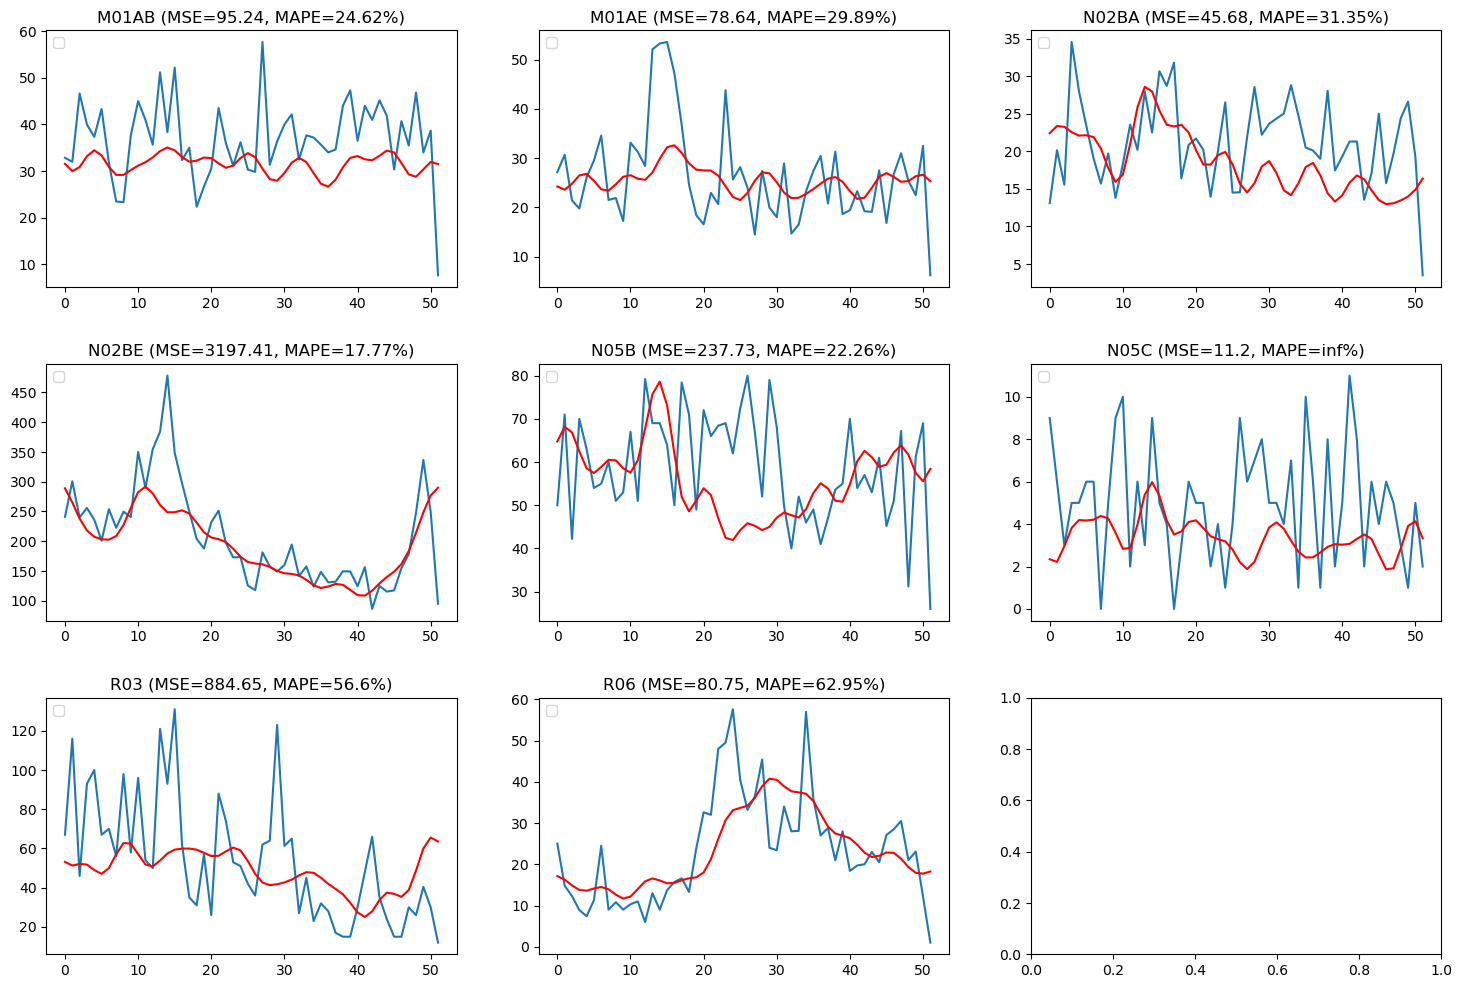

In [20]:
df=pd.read_csv('salesweekly.csv')

subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12)) 
plt.subplots_adjust(wspace=0.2, hspace=0.3) 
for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    X = df[['datum', x]].copy()  # Select date and the specific column
    size = len(X) - 52
    
    # Split into training and testing sets
    train_df = X.iloc[:size].rename(columns={'datum': 'ds', x: 'y'})
    test_df = X.iloc[size:].rename(columns={'datum': 'ds', x: 'y'})
    
    # Fit the model
    model = Prophet()
    model.fit(train_df)
    
    df_test_fcst = model.predict(test_df[['ds']])
    
    # Extract actual and predicted values
    test = test_df['y'].values
    predictions = df_test_fcst['yhat'].values

    rowindex = subplotindex // numcols
    colindex = subplotindex % numcols

    
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRolling_weekdf.loc['Prophet MSE',x]=error
    resultsRolling_weekdf.loc['Prophet MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()    

23:20:28 - cmdstanpy - INFO - Chain [1] start processing
23:20:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2856\4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
23:20:29 - cmdstanpy - INFO - Chain [1] start processing
23:20:29 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2856\4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
23:20:29 - cmdstanpy - INFO - Chain [1] start processing
23:20:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\WELCOME\AppData\Local\Temp\ipykernel_2856\4111968303.py:3: RuntimeWarning: divide by zero encountered in divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
23:20:30 - cmdstanpy - INFO - Chain [1] start processing
23:20:30 - cmdstanpy - INFO - Chain [1] done processing
C:\Users

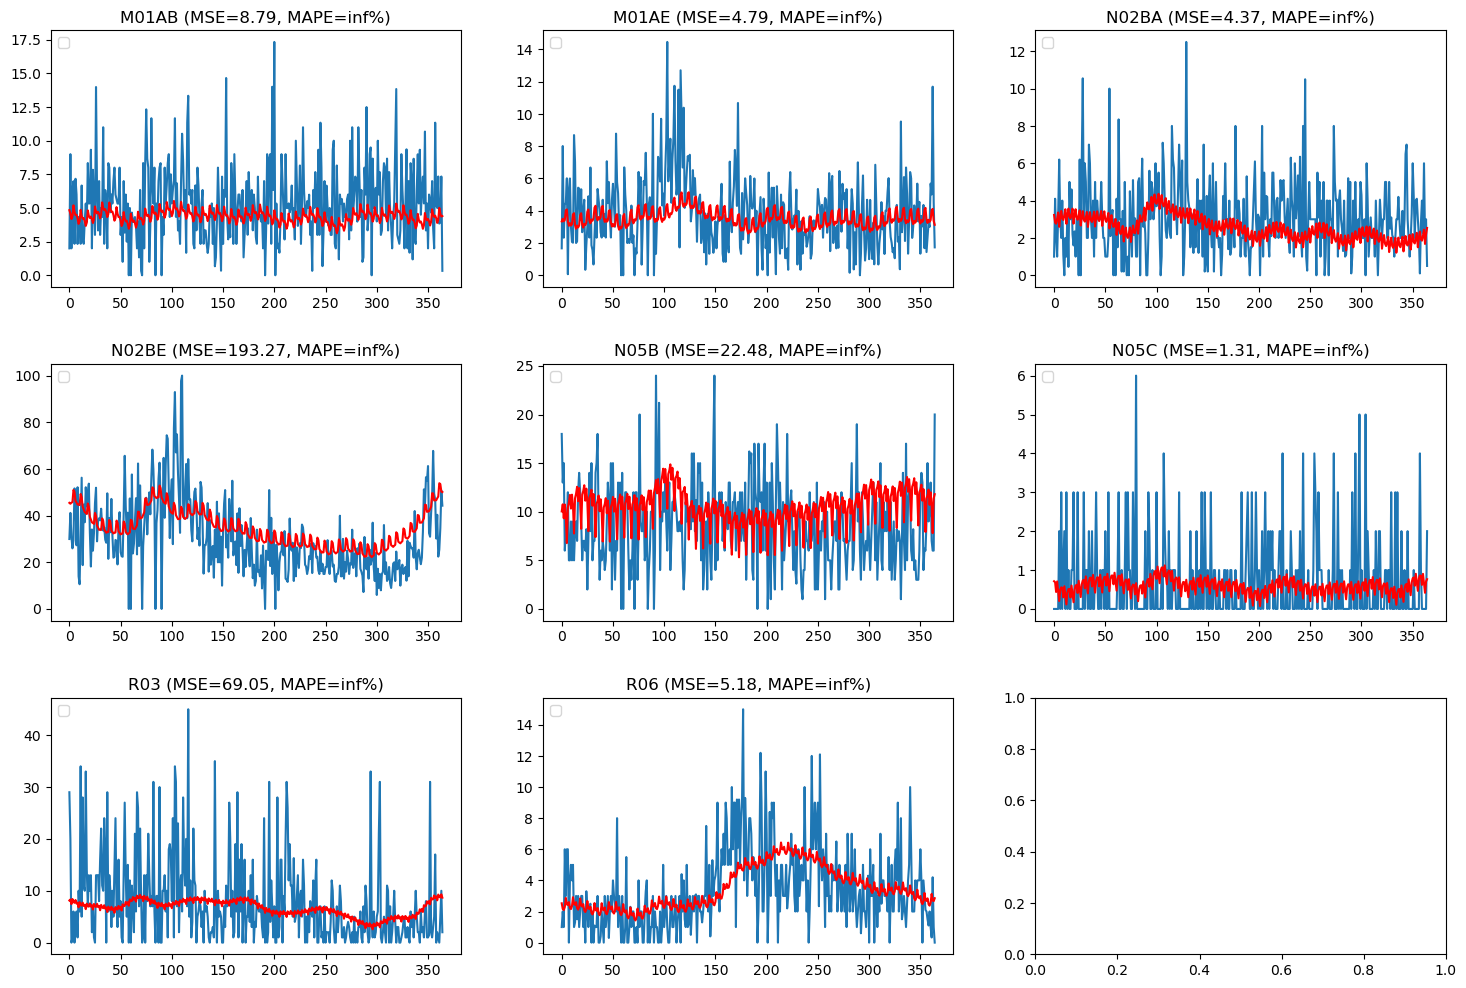

In [23]:
df=pd.read_csv('salesdaily.csv')


subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))  
plt.subplots_adjust(wspace=0.2, hspace=0.3)  
for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    X = df[['datum', x]].copy()  # Select date and the specific column
    size = len(X) - 365
    
    # Split into training and testing sets
    train_df = X.iloc[:size].rename(columns={'datum': 'ds', x: 'y'})
    test_df = X.iloc[size:].rename(columns={'datum': 'ds', x: 'y'})
    
    # Fit the model
    model = Prophet()
    model.fit(train_df)
    
    df_test_fcst = model.predict(test_df[['ds']])
    
    # Extract actual and predicted values
    test = test_df['y'].values
    predictions = df_test_fcst['yhat'].values

    rowindex = subplotindex // numcols
    colindex = subplotindex % numcols

    
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRolling_dailydf.loc['Prophet MSE',x]=error
    resultsRolling_dailydf.loc['Prophet MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()    

C:\Users\WELCOME\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 785ms/step - loss: 0.2661 - val_loss: 0.1819
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.2365 - val_loss: 0.1615
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.2095 - val_loss: 0.1419
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.1959 - val_loss: 0.1225
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.1626 - val_loss: 0.1030
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1377 - val_loss: 0.0837
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.1274 - val_loss: 0.0656
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.1065 - val_loss: 0.0503
Epoch 9/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0928 - val_loss: 0.0387
Epoch 10/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0906 - val_loss: 0.0307
Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0815 - val_loss: 0.0257
Epoch 12/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 0.0796 - val_loss: 0.022

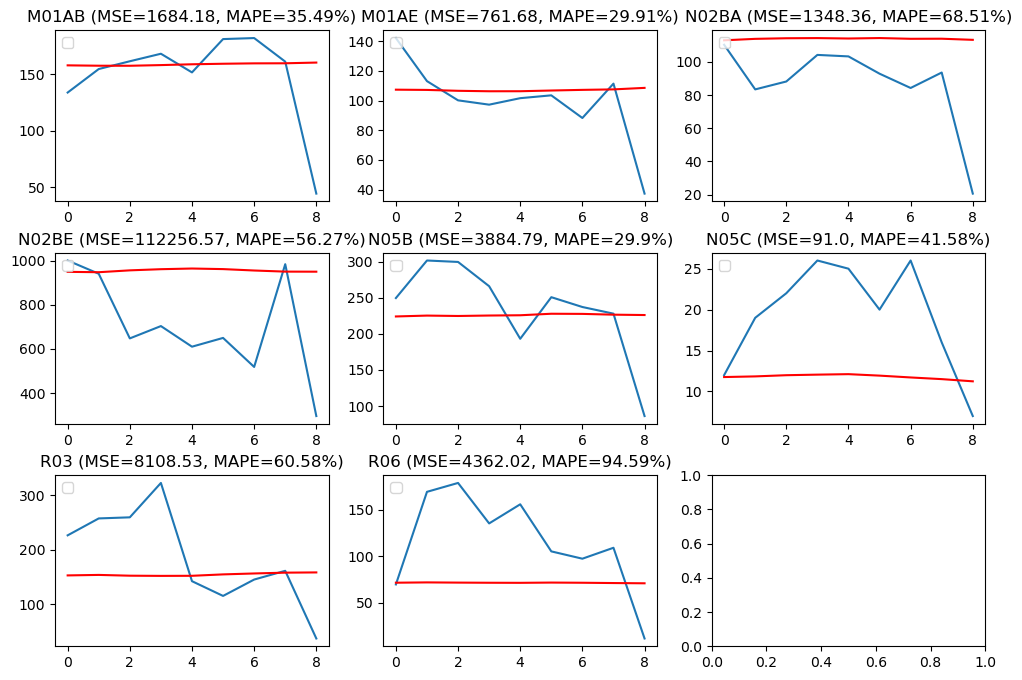

In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

df = pd.read_csv('salesmonthly.csv')

# Adjust sequence length and batch size
seq_length = 12  # Adjusted sequence length for monthly data

# Prepare the data for LSTM
df_numeric = df.select_dtypes(include=[np.number])

# Check if 'datum' column is numeric and drop it
if 'datum' in df_numeric.columns:
    df_numeric = df_numeric.drop(columns=['datum'])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_numeric.values)

# Prepare training and test data
train_size = int(len(scaled_data) * 0.7)  # Adjusted training size
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=25, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=25, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=X_train.shape[2]))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_split=0.2, callbacks=[early_stopping])

# Predict and inverse transform
predicted_sales = model.predict(X_test)
predicted_sales = scaler.inverse_transform(predicted_sales)

real_sales = scaler.inverse_transform(y_test)

# Plotting (optional)
import matplotlib.pyplot as plt

# Prepare plots
subplotindex = 0
numrows = 3  # Adjusted for fewer plots
numcols = 3
fig, ax = plt.subplots(numrows, numcols, figsize=(12, 8))  
plt.subplots_adjust(wspace=0.2, hspace=0.3) 
col = df_numeric.columns  # Use actual column names
for x in range(len(col)):
    rowindex = subplotindex // numcols
    colindex = subplotindex % numcols
    
    error = mean_squared_error(real_sales[:,x], predicted_sales[:,x])
    perror = mean_absolute_percentage_error(real_sales[:,x], predicted_sales[:,x])*100
    resultsRolling_monthdf.loc['LSTM MSE',col[x]]=error
    resultsRolling_monthdf.loc['LSTM MAPE',col[x]]=perror
    ax[rowindex, colindex].set_title(col[x] + ' (MSE=' + str(round(error, 2)) + ', MAPE=' + str(round(perror, 2)) + '%)')
    ax[rowindex, colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex, colindex].plot(real_sales[:,x], label='Real')
    ax[rowindex, colindex].plot(predicted_sales[:,x], color='red', label='Predicted')
    subplotindex += 1

plt.show()


C:\Users\WELCOME\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - loss: 0.2676 - val_loss: 0.1566
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.2176 - val_loss: 0.1258
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1779 - val_loss: 0.0980
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.1391 - val_loss: 0.0731
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.1074 - val_loss: 0.0515
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0860 - val_loss: 0.0340
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0722 - val_loss: 0.0217
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0469 - val_loss: 0.0153
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0483 - val_loss: 0.0143
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0488 - val_loss: 0.0165
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0538 - val_loss: 0.0186
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0537 - val_loss: 0.0197
E

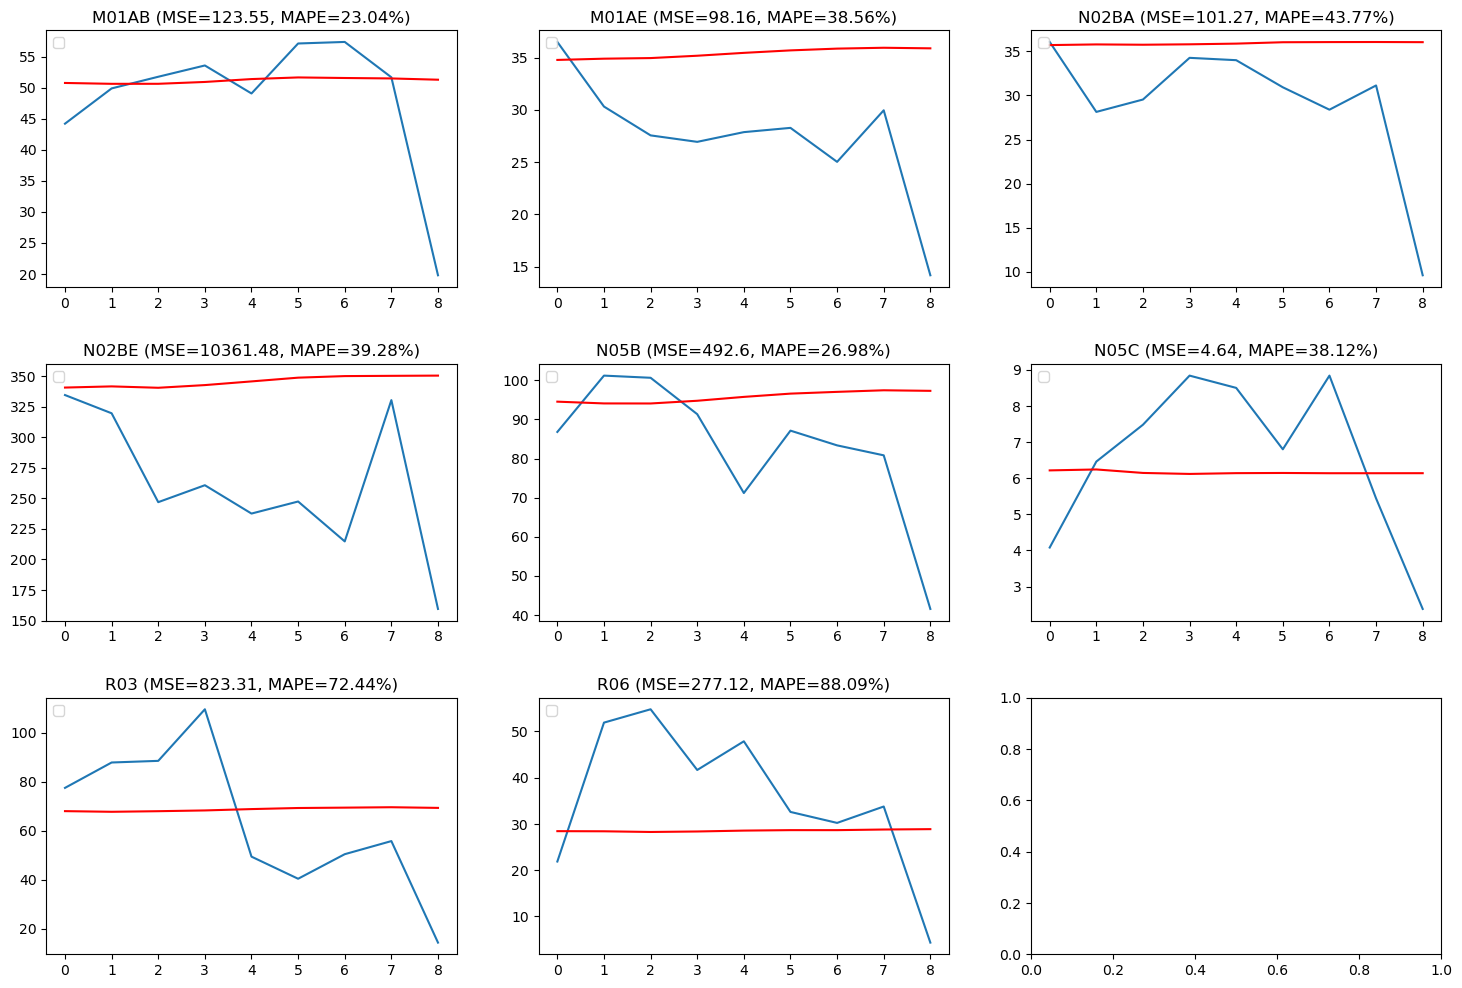

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('salesweekly.csv')
 

seq_length = 60

# Prepare the data for LSTM
df_numeric = df.select_dtypes(include=[np.number])

# Check if 'datum' column is numeric and drop it
if 'datum' in df_numeric.columns:
    df_numeric = df_numeric.drop(columns=['datum'])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_numeric.values)

# Prepare training and test data
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)

    # Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=X_train.shape[2]))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

predicted_sales = model.predict(X_test)
predicted_sales = scaler.inverse_transform(predicted_sales)

    # Since y_test is already a 2D array, no need to reshape with an extra dimension
real_sales = scaler.inverse_transform(y_test)


# Prepare the plots
subplotindex = 0
numrows = 3
numcols = 3
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))  
plt.subplots_adjust(wspace=0.2, hspace=0.3) 
col=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
for x in range(len(col)):
    rowindex = subplotindex // numcols
    colindex = subplotindex % numcols
    
    error = mean_squared_error(real_sales[:,x], predicted_sales[:,x])
    perror = mean_absolute_percentage_error(real_sales[:,x],predicted_sales[:,x])*100
    resultsRolling_weekdf.loc['LSTM MSE',col[x]]=error
    resultsRolling_weekdf.loc['LSTM MAPE',col[x]]=perror
    ax[rowindex, colindex].set_title(col[x] + ' (MSE=' + str(round(error, 2)) + ', MAPE=' + str(round(perror, 2)) + '%)')
    ax[rowindex, colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex, colindex].plot(real_sales[:,x], label='Real')
    ax[rowindex, colindex].plot(predicted_sales[:,x].flatten(), color='red', label='Predicted')
    subplotindex = subplotindex + 1

plt.show()



Epoch 1/30


C:\Users\WELCOME\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 67ms/step - loss: 0.0801 - val_loss: 0.0264
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0255 - val_loss: 0.0173
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0216 - val_loss: 0.0172
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0192 - val_loss: 0.0160
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0173 - val_loss: 0.0162
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0173 - val_loss: 0.0154
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0172 - val_loss: 0.0154
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0167 - val_loss: 0.0159
Epoch 9/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0161 - val_loss: 0.0153
Epoch 10/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0154 - val_loss: 0.0153
Epoch 11/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 0.0157 - val_loss: 0.0152
Epoch 12/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0149 - val_l

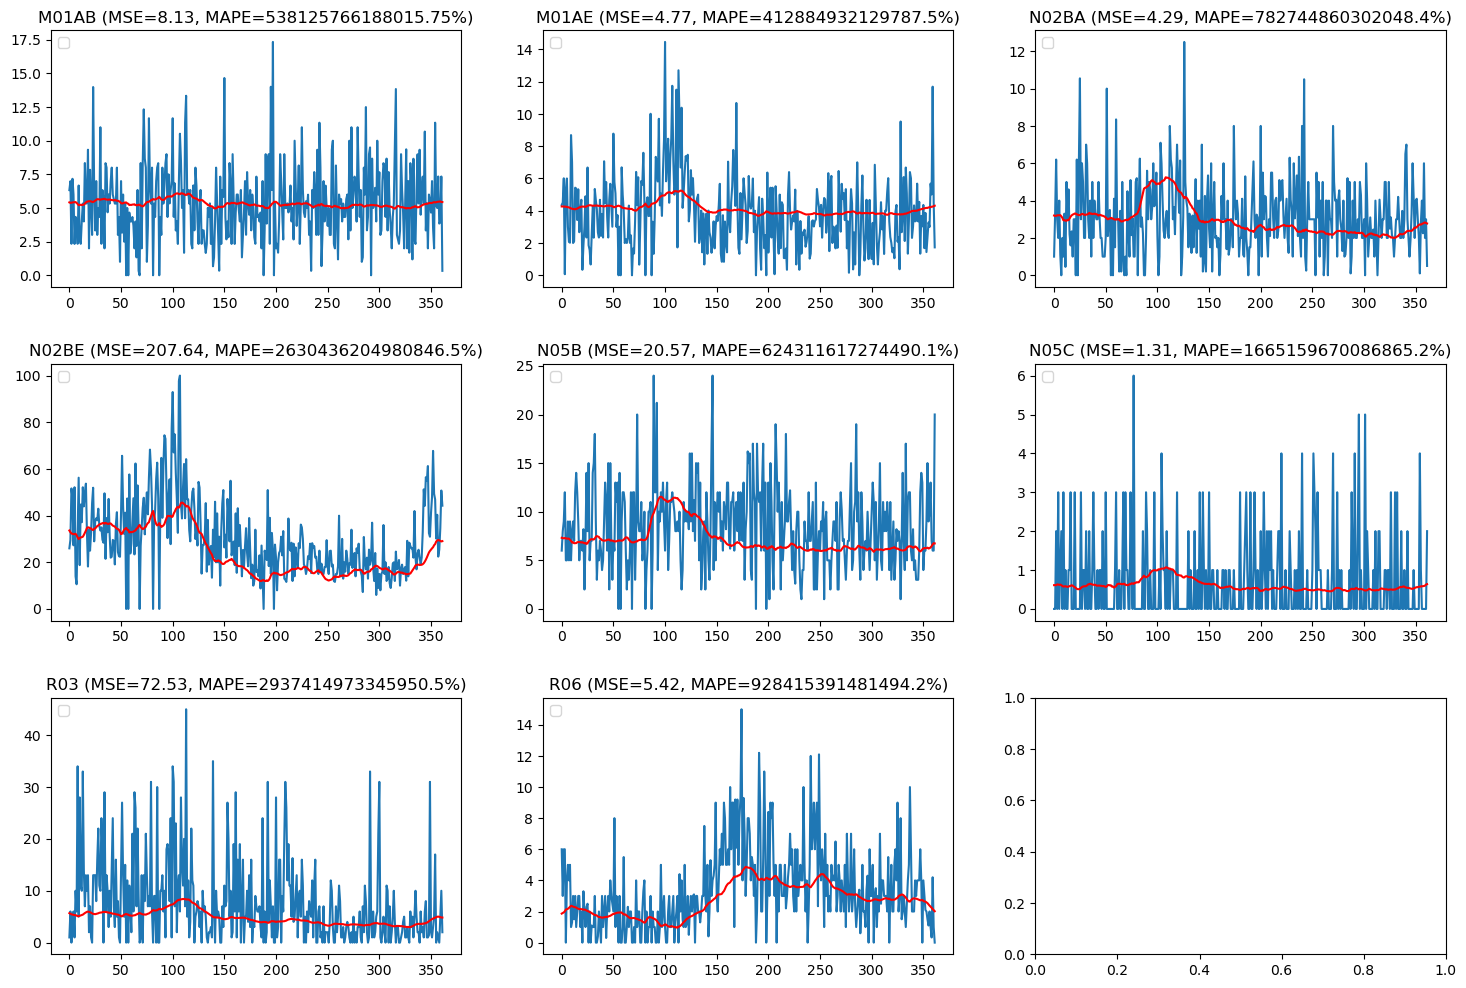

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
df = pd.read_csv('salesdaily.csv')
 

seq_length = 60

# Prepare the data for LSTM
df_numeric = df.select_dtypes(include=[np.number])

# Check if 'datum' column is numeric and drop it
if 'datum' in df_numeric.columns:
    df_numeric = df_numeric.drop(columns=['datum'])

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_numeric.values)

# Prepare training and test data
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])
    return np.array(sequences), np.array(labels)

X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

    # Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=X_train.shape[2]))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

predicted_sales = model.predict(X_test)
predicted_sales = scaler.inverse_transform(predicted_sales)

    # Since y_test is already a 2D array, no need to reshape with an extra dimension
real_sales = scaler.inverse_transform(y_test)


# Prepare the plots
subplotindex = 0
numrows = 3
numcols = 3
fig, ax = plt.subplots(numrows, numcols, figsize=(18, 12))  
plt.subplots_adjust(wspace=0.2, hspace=0.3) 
col=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']
for x in range(len(col)):
    rowindex = subplotindex // numcols
    colindex = subplotindex % numcols
    
    error = mean_squared_error(real_sales[:,x], predicted_sales[:,x])
    perror = mean_absolute_percentage_error(real_sales[:,x],predicted_sales[:,x])
    resultsRolling_dailydf.loc['LSTM MSE',col[x]]=error
    resultsRolling_dailydf.loc['LSTM MAPE',col[x]]=perror
    ax[rowindex, colindex].set_title(col[x] + ' (MSE=' + str(round(error, 2)) + ', MAPE=' + str(round(perror, 2)) + '%)')
    ax[rowindex, colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex, colindex].plot(real_sales[:,x], label='Real')
    ax[rowindex, colindex].plot(predicted_sales[:,x].flatten(), color='red', label='Predicted')
    subplotindex = subplotindex + 1

plt.show()



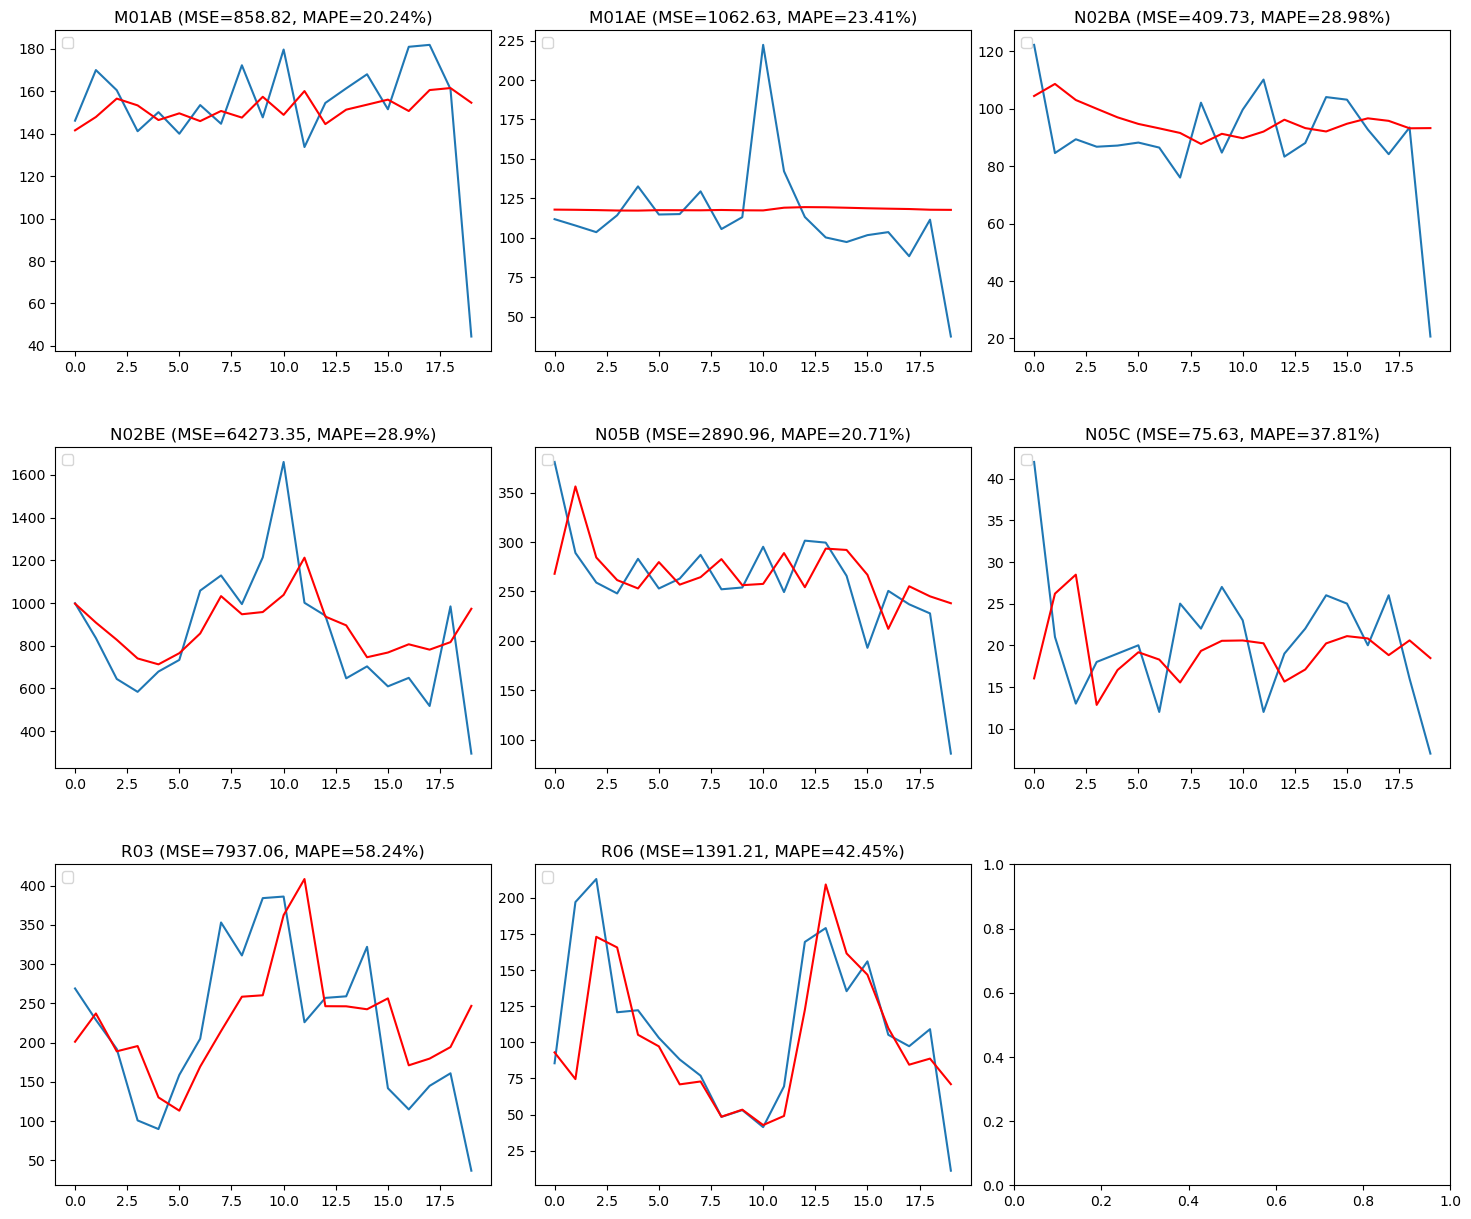

In [45]:
from pmdarima import auto_arima

df=pd.read_csv('salesmonthly.csv')
subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)


for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = len(X)-20
    train, test = X[0:size], X[size:len(X)]
    history = [c for c in train]
    predictions = list()
    for t in range(len(test)):
        if (x=='N02BA' or x=='N02BE' or x=='R03' or x=='R06'):
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12, max_d=1, max_D=1,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        else:
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        model_fit = model.fit(history)
        output = model_fit.predict(n_periods=1)
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)*100
    resultsRolling_monthdf.loc['AutoARIMA MSE',x]=error
    resultsRolling_monthdf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

MemoryError: Unable to allocate 26.5 MiB for an array with shape (107, 107, 303) and data type float64

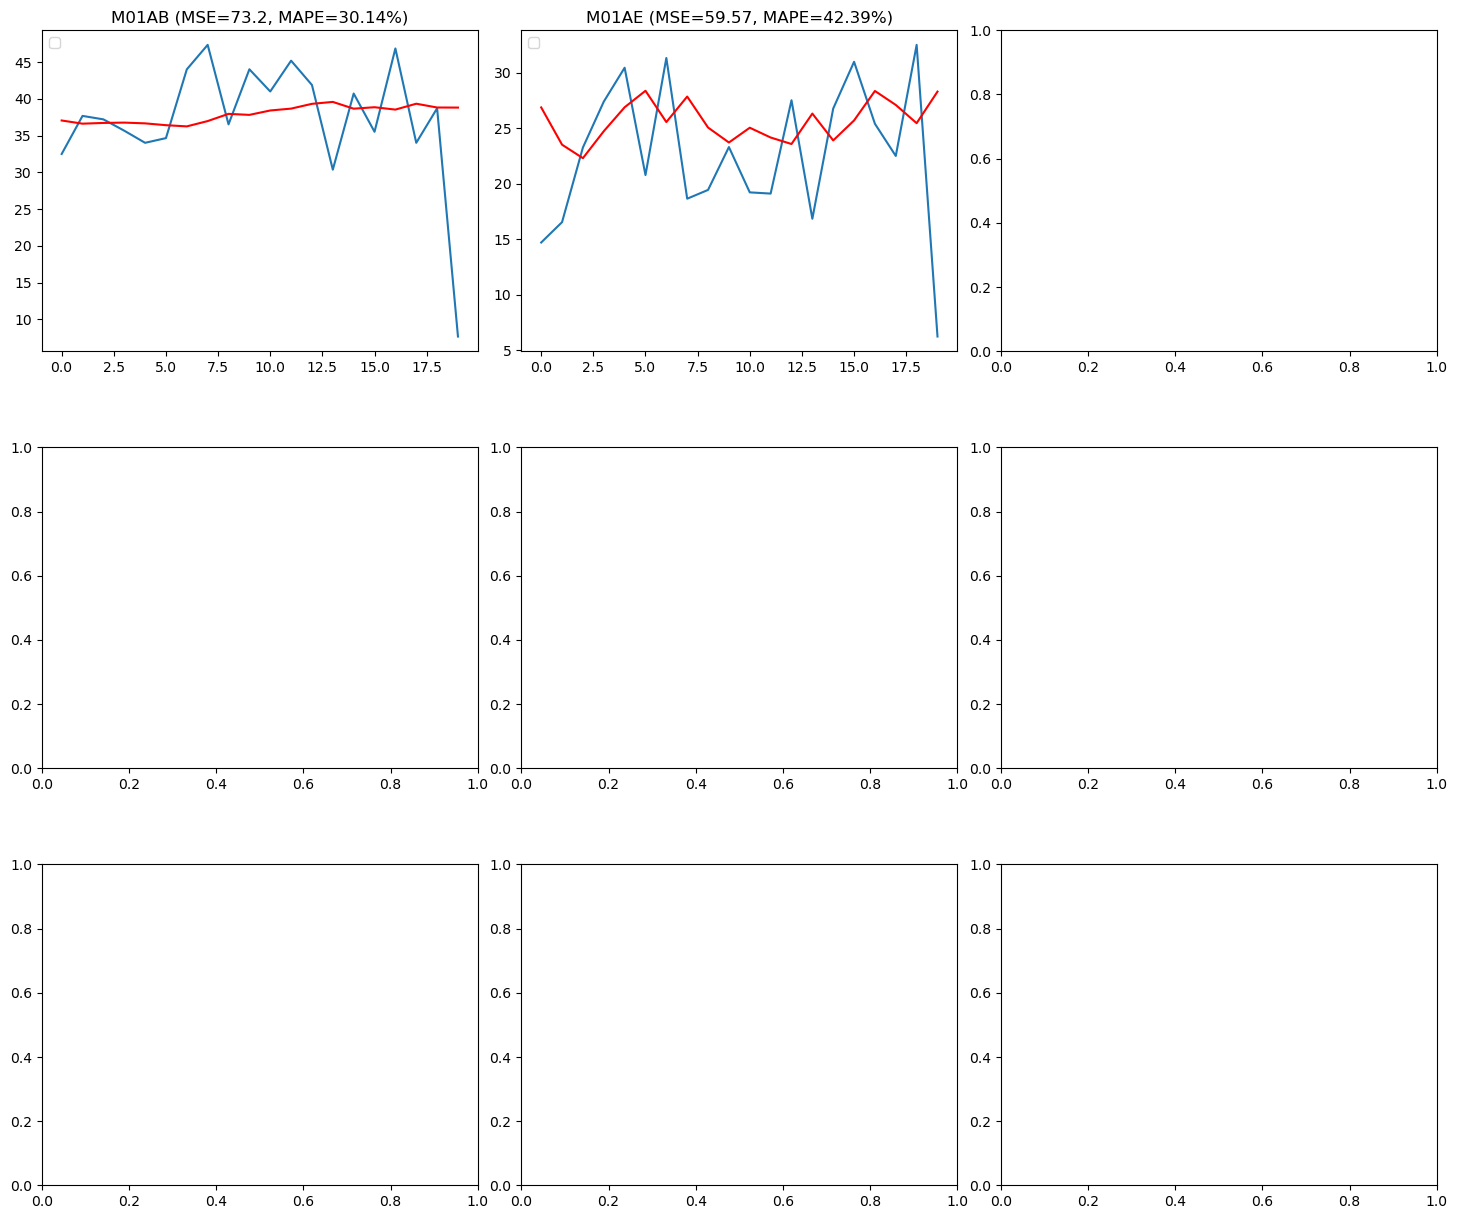

In [9]:
from pmdarima import auto_arima

df=pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)


for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = len(X)-20
    train, test = X[0:size], X[size:len(X)]
    history = [c for c in train]
    predictions = list()
    for t in range(len(test)):
        if (x=='N02BA' or x=='N02BE' or x=='R03' or x=='R06'):
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=52, max_d=1, max_D=1,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        else:
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        model_fit = model.fit(history)
        output = model_fit.predict(n_periods=1)
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)
    resultsRolling_monthdf.loc['AutoARIMA MSE',x]=error
    resultsRolling_monthdf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

MemoryError: Unable to allocate 58.2 MiB for an array with shape (159, 159, 302) and data type float64

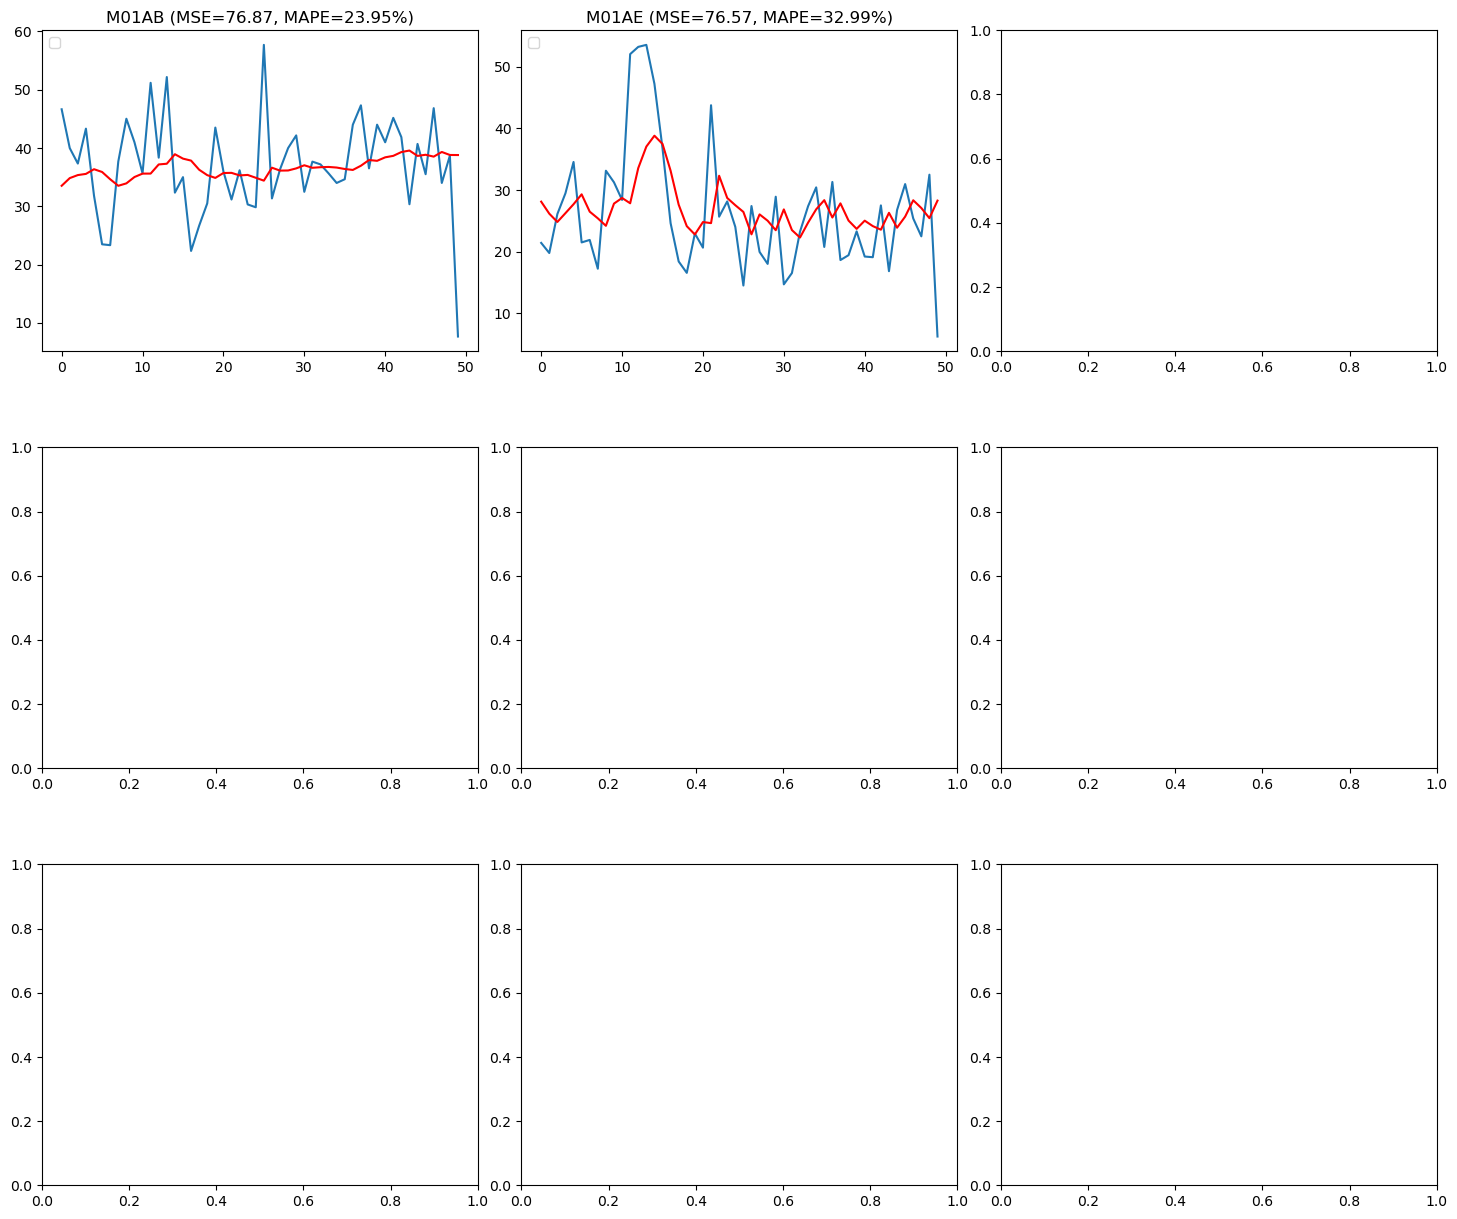

In [57]:
from pmdarima import auto_arima

df=pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=3
numcols=3
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)


for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = len(X)-50
    train, test = X[0:size], X[size:len(X)]
    history = [c for c in train]
    predictions = list()
    for t in range(len(test)):
        if (x=='N02BA' or x=='N02BE' or x=='R03' or x=='R06'):
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=52, max_d=1, max_D=1,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        else:
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        model_fit = model.fit(history)
        output = model_fit.predict(n_periods=1)
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)*100
    resultsRolling_weekdf.loc['AutoARIMA MSE',x]=error
    resultsRolling_weekdf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

In [ ]:
from pmdarima import auto_arima

df=pd.read_csv('salesweekly.csv')
subplotindex=0
numrows=2
numcols=2
fig, ax = plt.subplots(numrows, numcols, figsize=(18,15))
plt.subplots_adjust(wspace=0.1, hspace=0.3)


for x in ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06']:
    rowindex=math.floor(subplotindex/numcols)
    colindex=subplotindex-(rowindex*numcols)
    X = df[x].values
    size = len(X)-100
    train, test = X[0:size], X[size:len(X)]
    history = [c for c in train]
    predictions = list()
    for t in range(len(test)):
        if (x=='N02BA' or x=='N02BE' or x=='R03' or x=='R06'):
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=365, max_d=1, max_D=1,
                           start_P=0, start_Q=0, max_P=5, max_Q=5, seasonal=True,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        else:
            model = auto_arima(X, start_p=1, start_q=1,
                           max_p=5, max_q=5, max_d=1,
                           trace=False, seasonal=False,
                           error_action='ignore',
                           suppress_warnings=True, 
                           stepwise=True)
        model_fit = model.fit(history)
        output = model_fit.predict(n_periods=1)
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    error = mean_squared_error(test, predictions)
    perror = mean_absolute_percentage_error(test, predictions)*100
    resultsRolling_dailydf.loc['AutoARIMA MSE',x]=error
    resultsRolling_dailydf.loc['AutoARIMA MAPE',x]=perror
    ax[rowindex,colindex].set_title(x+' (MSE=' + str(round(error,2))+', MAPE='+ str(round(perror,2)) +'%)')
    ax[rowindex,colindex].legend(['Real', 'Predicted'], loc='upper left')
    ax[rowindex,colindex].plot(test)
    ax[rowindex,colindex].plot(predictions, color='red')
    subplotindex=subplotindex+1
plt.show()

In [47]:
from IPython.display import display, HTML
display(HTML(resultsRolling_monthdf.head(4).to_html()))

# Transpose the DataFrame
transposed_df = resultsRolling_monthdf.head(4).T

# Display the transposed DataFrame
display(HTML(transposed_df.to_html()))


,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
Seasonal Naive MAPE,29.321032,37.582338,60.836744,41.372933,31.693866,32.527843,75.801061,60.225047
AutoARIMA MAPE,20.243822,23.414210,28.981357,28.897380,20.710824,37.813180,58.236697,42.447301
Prophet MAPE,31.333251,34.893713,41.423479,45.666890,33.812397,44.978347,80.383705,77.798937
LSTM MAPE,35.493965,29.912583,68.513999,56.270112,29.902127,41.576398,60.576217,94.591566


,Seasonal Naive MAPE,AutoARIMA MAPE,Prophet MAPE,LSTM MAPE
M01AB,29.321032,20.243822,31.333251,35.493965
M01AE,37.582338,23.414210,34.893713,29.912583
N02BA,60.836744,28.981357,41.423479,68.513999
N02BE,41.372933,28.897380,45.666890,56.270112
N05B,31.693866,20.710824,33.812397,29.902127
N05C,32.527843,37.813180,44.978347,41.576398
R03,75.801061,58.236697,80.383705,60.576217
R06,60.225047,42.447301,77.798937,94.591566


In [ ]:
!pip install pmdarima

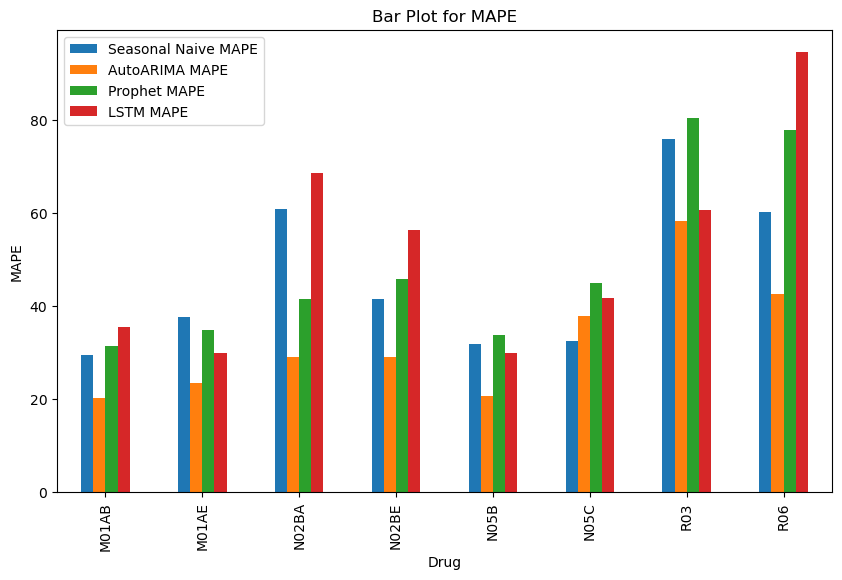

In [49]:
import matplotlib.pyplot as plt

data_to_plot = resultsRolling_monthdf.head(4).T

data_to_plot.plot(kind='bar', figsize=(10, 6))

plt.title('Bar Plot for MAPE')
plt.xlabel('Drug')
plt.ylabel('MAPE')

plt.show()


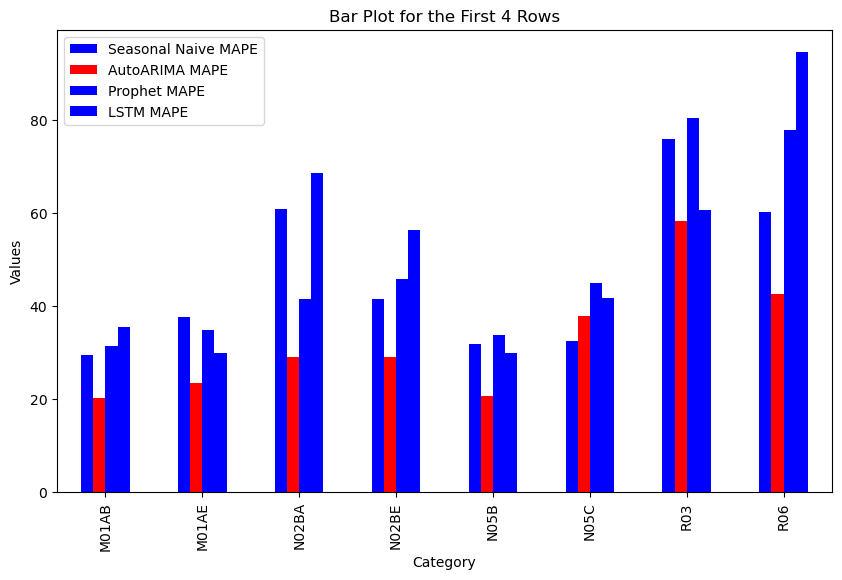

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Select the first 4 rows and transpose the DataFrame
data_to_plot = resultsRolling_monthdf.head(4).T

# Create an array for colors: default to 'blue'
colors = ['blue'] * data_to_plot.shape[1]

# Find the minimum value and its location
min_val = data_to_plot.min().min()
min_col = data_to_plot.min(axis=0).idxmin()
min_col_index = data_to_plot.columns.get_loc(min_col)

# Highlight the minimum value in red
colors[min_col_index] = 'red'

# Plot each row separately with custom colors
ax = data_to_plot.plot(kind='bar', figsize=(10, 6), color=colors)

# Set the title and labels
plt.title('Bar Plot for the First 4 Rows')
plt.xlabel('Category')
plt.ylabel('Values')

# Show the plot
plt.show()
